In [1]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
class Neuron:
    def __init__(self):
        self.w_0 = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
        self.w_1 = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
        self.bias = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
    
    def f(self, x_0, x_1):
        linear = x_0*self.w_0 + x_1*self.w_1 + self.bias
        non_linear = torch.clip(linear, 0., np.inf)
        return non_linear

class OutPutNeuron:
    def __init__(self):
        self.w_0 = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
        self.w_1 = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
        self.bias = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
    
    def f(self, x_0, x_1):
        linear = x_0*self.w_0 + x_1*self.w_1 + self.bias
        non_linear = torch.sigmoid(linear)
        return non_linear
    
    
n_0 = OutPutNeuron()
n_1 = OutPutNeuron()

n_1 = Neuron()
n_2 = Neuron()

def network(x_0, x_1):
    y = n_0.f(n_1.f(x_0, x_1), n_2.f(x_0, x_1))
    return y

In [2]:
network(-1., 0.1)

tensor([0.7685], grad_fn=<SigmoidBackward>)

In [3]:
iris = sklearn.datasets.load_iris()
data = iris['data'][iris['target']<2][:, :2]
labels = iris['target'][iris['target']<2]

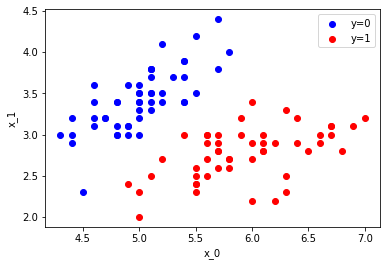

In [4]:
f, ax = plt.subplots()
ax.scatter(data[labels==0][:, 0], data[labels==0][:, 1], color='blue', label='y=0')
ax.scatter(data[labels==1][:, 0], data[labels==1][:, 1], color='red', label='y=1')
ax.set_xlabel("x_0")
ax.set_ylabel("x_1")
ax.legend()
plt.show()

In [5]:
predictions = []
for i in range(len(data)):
    x_0, x_1 = data[i]
    label = labels[i]
    prediction = network(x_0, x_1)
    predictions.append(prediction.detach().numpy()[0])
print(predictions)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [7]:
loss_function = nn.BCELoss()

In [8]:
params = [n_0.w_0, n_0.w_1, n_0.bias,
          n_1.w_0, n_1.w_1, n_1.bias,
          n_2.w_0, n_2.w_1, n_2.bias]

In [9]:
learning_rate = 0.002
optimizer = torch.optim.Adam(params=params, lr=learning_rate)

In [12]:
n_epochs = 100
for epoch_number in range(n_epochs):
    loss = 0
    for datapoint_number in range(len(data)):
        optimizer.zero_grad()

        x_0, x_1 = data[datapoint_number]
        label = labels[datapoint_number]
        prediction = network(x_0, x_1)
        loss = loss_function(prediction, torch.from_numpy(np.array([label]).astype(np.float32)))

        loss.backward()
        optimizer.step()

        loss += loss
    print(loss.detach().numpy())

0.028797247
0.02760769
0.026479118
0.025564885
0.02455947
0.023606671
0.022703035
0.021846445
0.021034556
0.020265024
0.019535633
0.018844051
0.018188197
0.017566351
0.01697632
0.016434897
0.015909122
0.0154232485
0.014959232
0.014517417
0.014094188
0.013704656
0.01332408
0.012960135
0.01261209
0.01227922
0.011960436
0.011655372
0.011363062
0.011083142
0.010814887
0.010557453
0.010310478
0.010073477
0.009845968
0.00962723
0.00941702
0.009214855
0.009020494
0.008833456
0.0086530205
0.008479185
0.00831183
0.008150354
0.007994635
0.007844075
0.007698911
0.007558544
0.007422973
0.0072915987
0.0071647796
0.007041916
0.006922888
0.0068076947
0.0066959765
0.006587614
0.0064828447
0.0063808314
0.006281933
0.006185909
0.0060925204
0.0060020057
0.005914006
0.0058282814
0.0057450715
0.005663897
0.0055849976
0.0055082524
0.005433304
0.005360509
0.00528951
0.005220306
0.005152778
0.0050868057
0.0050226282
0.004959887
0.004897267
0.0048350077
0.0047740648
0.004714677
0.004656845
0.0046002087
0.00454

In [15]:
predictions = []
for i in range(len(data)):
    x_0, x_1 = data[i]
    label = labels[i]
    prediction = network(x_0, x_1).detach().numpy()[0]
    print(f'prediction: {prediction:.2f}, label: {label}')


prediction: 0.01, label: 0
prediction: 0.09, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.03, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.04, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.07, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.02, label: 0
prediction: 0.01, label: 0
prediction: 0.18, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.02, label: 0
prediction: 0.07, label: 0
prediction: 0.01, label: 0
prediction: 0.01, label: 0
prediction: 0.03, label: 0
prediction: 0.03, label: 0
prediction: 0.05, label: 0
p